In [3]:
import sys
import os
module_path = os.path.abspath(os.path.join('../../../src'))
if module_path not in sys.path:
    sys.path.append(module_path)

%config InlineBackend.figure_format = 'retina'

In [4]:
from society.agents import AnalyticalAgent
from society.structure.network import RealNetwork
from society.beliefs import Distribution, BeliefDistribution
from society.structure import AgentNetwork
from updates import Interactions, UpdateRule
from simulation import Simulation, Insights
from plotting.basic import *
from matplotlib import pyplot as plt
from computations.insights.relative import diversity, disagreement
from plotting.summaries import *
from utils.io import save_arrays

In [5]:
linespace = Distribution(type="linespace", range=(-1,1))
unique = Distribution(type="unique", value=0.15)
belief_distribution = BeliefDistribution(unique, linespace)
network = RealNetwork("Advogato")
agent_network = AgentNetwork(belief_distribution, network, agent_type=AnalyticalAgent)
update_rule = UpdateRule(evaluation_bias=0.3, rewire_probability=0)
interactions = Interactions(update_rule, interacting_agents=True)
insights = Insights()
simulation = Simulation(1000, insights)

In [6]:
simulation.run(interactions, agent_network)

Progress: 100%|██████████| 1000/1000 [01:17<00:00, 12.93it/s]


/Users/martinprieto/Desktop/New_Honours_Refactored/src/plotting/basic.py:41: UserWarning: Attempt to set non-positive xlim on a log-scaled axis will be ignored.
  plt.imshow(histogram.T, aspect="auto", interpolation=interpolation , vmax=np.quantile(histogram, 0.9999))


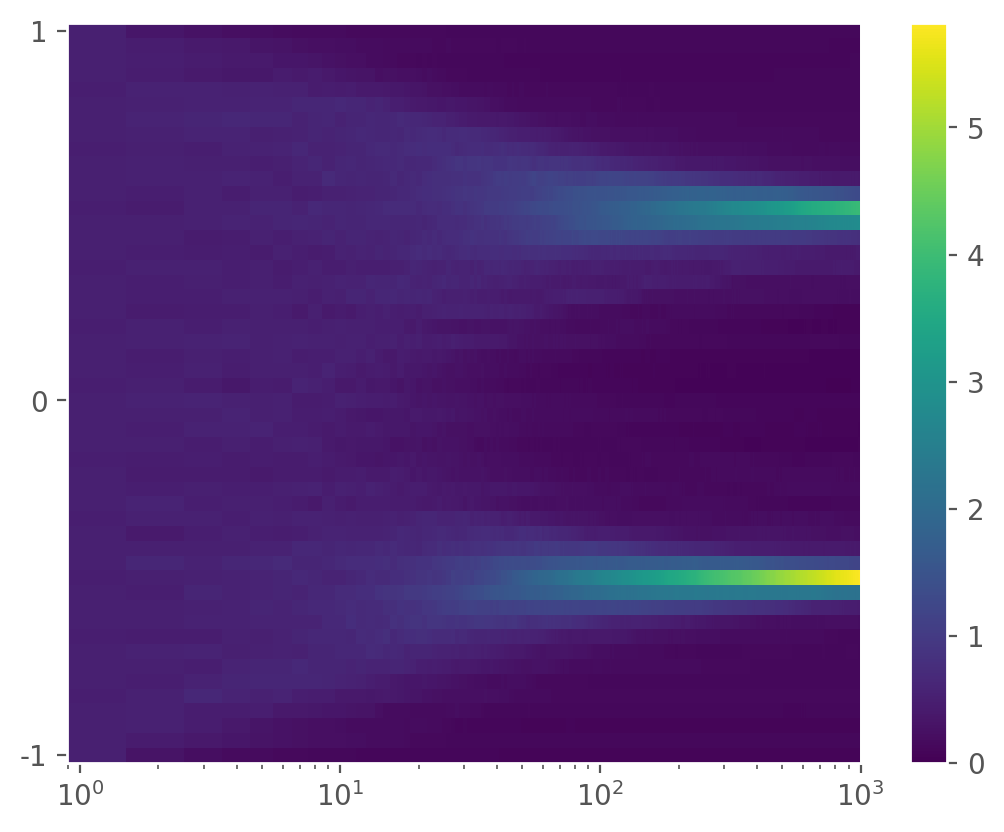

In [7]:
plot_density_of_opinions(simulation.insights.belief_evolution)